In [1]:
import pandas as pd

def evaluate_translations(filepath):
  
    # Carica il file CSV
    data = pd.read_csv(filepath, delimiter=',')

    # Calcola le deviazioni standard per ciascuna colonna di similarità rispetto a similarity_dataset
    deviation_phi = (data['dataset_similarity'] - data['similarity_phi']).std()
    deviation_madlad = (data['dataset_similarity'] - data['similarity_madlad']).std()
    deviation_helsinki = (data['dataset_similarity'] - data['similarity_helsinki']).std()

    # Determina quale modello si discosta meno dall'originale

    
    if deviation_phi == min(deviation_phi, deviation_madlad, deviation_helsinki):
        best_model = "Phi"
    elif deviation_madlad == min(deviation_phi, deviation_madlad, deviation_helsinki):
        best_model = "Madlad"
    else:
        best_model = "Helsinki"

    # Stampa i risultati
    print(f"Deviazione standard (Phi): {deviation_phi}")
    print(f"Deviazione standard (Madlad): {deviation_madlad}")
    print(f"Deviazione standard (Helsinki): {deviation_helsinki}")
    print(f"Il modello con traduzioni più vicine all'originale è: {best_model}")


In [2]:

def calculate_standard_deviation(filepath):
    # Carica il file CSV
    data = pd.read_csv(filepath, delimiter=',')

    # Calcola la deviazione standard per ciascuna colonna di similarità
    std_dataset = data['dataset_similarity'].std()
    std_phi = data['similarity_phi'].std()
    std_madlad = data['similarity_madlad'].std()
    std_helsinki = data['similarity_helsinki'].std()

    # Calcola std_gold solo se la colonna 'similarity_gold' esiste
    if 'similarity_gold' in data.columns:
        # Ignora le righe con valori nulli nella colonna 'similarity_gold' durante il calcolo
        std_gold = data['similarity_gold'].dropna().std()
        print(f"Deviazione standard del corpus gold: {std_gold}")
    else:
        print("")

    # Stampa i risultati
    print(f"Deviazione standard del dataset originale: {std_dataset}")
    print(f"Deviazione standard (Phi): {std_phi}")
    print(f"Deviazione standard (Madlad): {std_madlad}")
    print(f"Deviazione standard (Helsinki): {std_helsinki}")


In [3]:
from scipy.stats import pearsonr

def calculate_correlations(filepath):
    data = pd.read_csv(filepath, delimiter=',')

    # Rimuove righe con valori NaN nelle colonne rilevanti
    data = data.dropna(subset=['dataset_similarity', 'similarity_phi', 'similarity_madlad', 'similarity_helsinki'] + (["similarity_gold"] if "similarity_gold" in data.columns else []))

    results = {}
    for model in ['phi', 'madlad', 'helsinki'] + (['gold'] if "similarity_gold" in data.columns else []):
        # Ignora NaN per il calcolo della correlazione
        valid_data = data.dropna(subset=['dataset_similarity', f'similarity_{model}'])

        # Calcola la correlazione e il p-value
        corr, p_value = pearsonr(valid_data['dataset_similarity'], valid_data[f'similarity_{model}'])
        results[model] = {'correlation': corr, 'p_value': p_value}

    # Modello con la correlazione più alta
    best_model = max(results, key=lambda model: results[model]['correlation'])

    for model, stats in results.items():
        print(f"\nModello: {model}")
        print(f"Correlazione: {stats['correlation']:.4f}")
        print(f"P-value: {stats['p_value']:.4e}")
    print(f"\nIl modello con la correlazione più alta è: {best_model}")


In [4]:
if __name__ == "__main__":
    file_path = '/home/guest/alice.calderini/translation_comparison_results.csv'
    evaluate_translations(file_path)

Deviazione standard (Phi): 0.156174085108169
Deviazione standard (Madlad): 0.12382121059691822
Deviazione standard (Helsinki): 0.12314158356714545
Il modello con traduzioni più vicine all'originale è: Helsinki


In [5]:
if __name__ == "__main__":
    file_path = '/home/guest/alice.calderini/translation_comparison_results.csv'
    calculate_correlations(file_path)


Modello: phi
Correlazione: 0.0323
P-value: 6.9699e-01

Modello: madlad
Correlazione: 0.1659
P-value: 4.3901e-02

Modello: helsinki
Correlazione: 0.1847
P-value: 2.4599e-02

Modello: gold
Correlazione: 0.2280
P-value: 5.3294e-03

Il modello con la correlazione più alta è: gold


In [6]:
if __name__ == "__main__":
    file_path = '/home/guest/alice.calderini/translation_comparison_results.csv'
    calculate_standard_deviation(file_path)

Deviazione standard del corpus gold: 0.1315873893093738
Deviazione standard del dataset originale: 0.02903460668649989
Deviazione standard (Phi): 0.1543810613167883
Deviazione standard (Madlad): 0.12527739498998802
Deviazione standard (Helsinki): 0.1251501104935328


In [7]:
if __name__ == "__main__":
    file_path = '/home/guest/alice.calderini/unsupervised_results.csv'
    evaluate_translations(file_path)

Deviazione standard (Phi): 0.1492081486112761
Deviazione standard (Madlad): 0.13395123099212256
Deviazione standard (Helsinki): 0.13844415808524652
Il modello con traduzioni più vicine all'originale è: Madlad


In [8]:
if __name__ == "__main__":
    file_path = '/home/guest/alice.calderini/unsupervised_results.csv'
    calculate_standard_deviation(file_path)


Deviazione standard del dataset originale: 0.03065412654285848
Deviazione standard (Phi): 0.14849901262398216
Deviazione standard (Madlad): 0.13347592026811464
Deviazione standard (Helsinki): 0.13935282601948037


In [9]:
if __name__ == "__main__":
    file_path = '/home/guest/alice.calderini/unsupervised_results.csv'
    calculate_correlations(file_path)


Modello: phi
Correlazione: 0.0814
P-value: 4.0853e-02

Modello: madlad
Correlazione: 0.0997
P-value: 1.2206e-02

Modello: helsinki
Correlazione: 0.1363
P-value: 5.9781e-04

Il modello con la correlazione più alta è: helsinki


In [10]:
import pandas as pd
import sys
!{sys.executable} -m pip install evaluate
import evaluate

In [14]:
# File di input
file_path_comparisons = 'translation_comparison_results.csv'

# Carica il dataset
data_comparisons = pd.read_csv(file_path_comparisons)

# Inizializza la metrica BLEU con evaluate
bleu_metric = evaluate.load("bleu")

def calculate_bleu(data, reference_column, translation_column):
    """
    Calcola il BLEU score per le traduzioni in base alle caption originali.
    """
    # Prepara i dati per il calcolo del BLEU
    references = [[ref] for ref in data[reference_column]]  # Riferimenti come liste di stringhe
    predictions = data[translation_column].tolist()         # Predizioni come lista di stringhe

    # Calcola il punteggio BLEU
    bleu_score = bleu_metric.compute(predictions=predictions, references=references)['bleu']
    return bleu_score

# Calcola i punteggi BLEU per ciascun modello confrontando con 'Italian'
bleu_phi = calculate_bleu(data_comparisons, reference_column='Italian', translation_column='phi_translation')
bleu_madlad = calculate_bleu(data_comparisons, reference_column='Italian', translation_column='madlad_translation')
bleu_helsinki = calculate_bleu(data_comparisons, reference_column='Italian', translation_column='helsinki_translation')

# Stampa i risultati
print(f"BLEU score (Phi): {bleu_phi}")
print(f"BLEU score (Madlad): {bleu_madlad}")
print(f"BLEU score (Helsinki): {bleu_helsinki}")

# Determina il modello migliore
best_model = max(
    [('Phi', bleu_phi), ('Madlad', bleu_madlad), ('Helsinki', bleu_helsinki)],
    key=lambda x: x[1]
)

print(f"Il modello con il BLEU score più alto è: {best_model[0]} con un punteggio di {best_model[1]}")



BLEU score (Phi): 0.15224452523375803
BLEU score (Madlad): 0.36657717038055965
BLEU score (Helsinki): 0.26769254454287394
Il modello con il BLEU score più alto è: Madlad con un punteggio di 0.36657717038055965


In [16]:
!{sys.executable} -m pip install rouge-score absl-py


# File di input
file_path_comparisons = 'translation_comparison_results.csv'

# Carica il dataset
data_comparisons = pd.read_csv(file_path_comparisons)

# Inizializza la metrica ROUGE con evaluate
rouge_metric = evaluate.load("rouge")

def calculate_rouge(data, reference_column, translation_column):
    """
    Calcola i punteggi ROUGE per le traduzioni in base alle caption originali.
    """
    # Prepara i dati per il calcolo di ROUGE
    references = data[reference_column].tolist()  # Lista di stringhe di riferimento
    predictions = data[translation_column].tolist()  # Lista di stringhe predette

    # Calcola i punteggi ROUGE
    rouge_scores = rouge_metric.compute(predictions=predictions, references=references)
    return rouge_scores

# Calcola i punteggi ROUGE per ciascun modello confrontando con 'Italian'
rouge_phi = calculate_rouge(data_comparisons, reference_column='Italian', translation_column='phi_translation')
rouge_madlad = calculate_rouge(data_comparisons, reference_column='Italian', translation_column='madlad_translation')
rouge_helsinki = calculate_rouge(data_comparisons, reference_column='Italian', translation_column='helsinki_translation')

# Stampa i risultati
print("ROUGE score (Phi):", rouge_phi)
print("ROUGE score (Madlad):", rouge_madlad)
print("ROUGE score (Helsinki):", rouge_helsinki)

# Determina il modello migliore basandosi su ROUGE-L (lunghezza media)
best_model = max(
    [('Phi', rouge_phi['rougeL']), ('Madlad', rouge_madlad['rougeL']), ('Helsinki', rouge_helsinki['rougeL'])],
    key=lambda x: x[1]
)

print(f"\nIl modello con il ROUGE-L più alto è: {best_model[0]} con un punteggio di {best_model[1]}")


  Preparing metadata (setup.py) ... done
  Created wheel for rouge-score: filename=rouge_score-0.1.2-py3-none-any.whl size=24935 sha256=c43e1f31305366fa0ffcff0ea11d8ae3dd53bf519124d1146b23d2749b211e59
  Stored in directory: /home/guest/.cache/pip/wheels/5f/dd/89/461065a73be61a532ff8599a28e9beef17985c9e9c31e541b4
Successfully built rouge-score
ROUGE score (Phi): {'rouge1': np.float64(0.46524508958183214), 'rouge2': np.float64(0.25609972652351465), 'rougeL': np.float64(0.4381804566884068), 'rougeLsum': np.float64(0.43919569601931086)}
ROUGE score (Madlad): {'rouge1': np.float64(0.7104721699099993), 'rouge2': np.float64(0.48236372841048786), 'rougeL': np.float64(0.6432788627578783), 'rougeLsum': np.float64(0.6427385731786806)}
ROUGE score (Helsinki): {'rouge1': np.float64(0.6325733376840683), 'rouge2': np.float64(0.36241472081166143), 'rougeL': np.float64(0.5677469491588771), 'rougeLsum': np.float64(0.5662026011512222)}

Il modello con il ROUGE-L più alto è: Madlad con un punteggio di 0.6

In [6]:
pip install bert_score

Note: you may need to restart the kernel to use updated packages.


In [7]:
import pandas as pd
import evaluate

# Carica il dataset
file_path = 'translation_comparison_results.csv'
data = pd.read_csv(file_path)

# Carica il BERTScore
bertscore = evaluate.load("bertscore")

def calculate_bertscore(data, reference_column, translation_column, lang="it"):
    """
    Calcola il BERTScore per ogni modello rispetto alla colonna di riferimento.
    """
    # Estrai riferimenti e predizioni
    references = data[reference_column].tolist()
    predictions = data[translation_column].tolist()

    # Calcola il BERTScore
    results = bertscore.compute(predictions=predictions, references=references, lang=lang)
    return results

# Calcola il BERTScore per ogni modello
bertscore_phi = calculate_bertscore(data, reference_column='Italian', translation_column='phi_translation')
bertscore_madlad = calculate_bertscore(data, reference_column='Italian', translation_column='madlad_translation')
bertscore_helsinki = calculate_bertscore(data, reference_column='Italian', translation_column='helsinki_translation')

# Calcola la media dei punteggi
def mean_bertscore(bertscore_results):
    """
    Calcola la media di precision, recall e f1 da un risultato BERTScore.
    """
    precision = sum(bertscore_results['precision']) / len(bertscore_results['precision'])
    recall = sum(bertscore_results['recall']) / len(bertscore_results['recall'])
    f1 = sum(bertscore_results['f1']) / len(bertscore_results['f1'])
    return precision, recall, f1

# Media per ogni modello
precision_phi, recall_phi, f1_phi = mean_bertscore(bertscore_phi)
precision_madlad, recall_madlad, f1_madlad = mean_bertscore(bertscore_madlad)
precision_helsinki, recall_helsinki, f1_helsinki = mean_bertscore(bertscore_helsinki)

# Stampa i risultati con formattazione
print(f"BERTScore (Phi): Precision: {precision_phi:.4f}, Recall: {recall_phi:.4f}, F1: {f1_phi:.4f}")
print(f"BERTScore (Madlad): Precision: {precision_madlad:.4f}, Recall: {recall_madlad:.4f}, F1: {f1_madlad:.4f}")
print(f"BERTScore (Helsinki): Precision: {precision_helsinki:.4f}, Recall: {recall_helsinki:.4f}, F1: {f1_helsinki:.4f}")


BERTScore (Phi): Precision: 0.7875, Recall: 0.7891, F1: 0.7878
BERTScore (Madlad): Precision: 0.8623, Recall: 0.8592, F1: 0.8605
BERTScore (Helsinki): Precision: 0.8437, Recall: 0.8387, F1: 0.8410


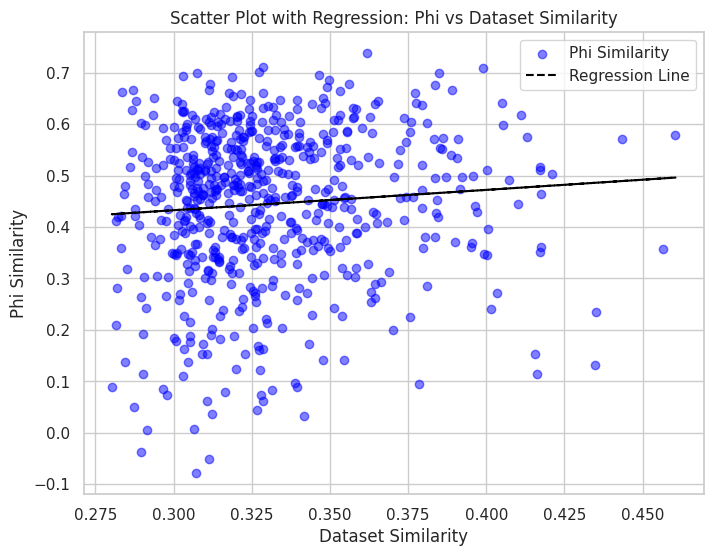

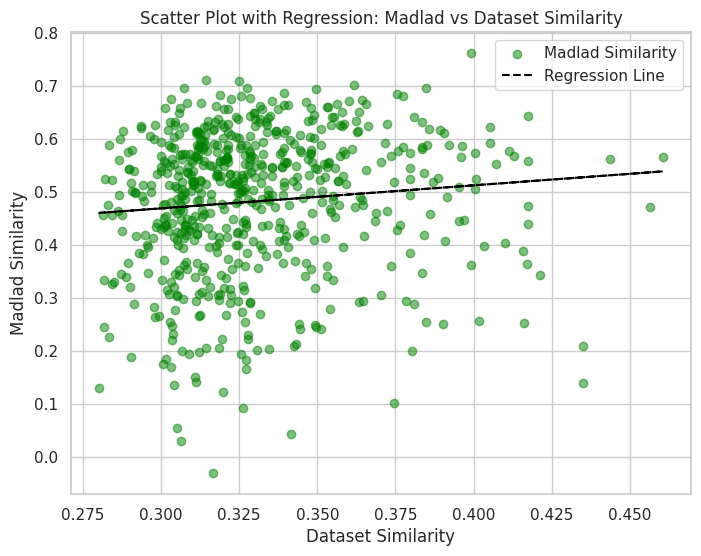

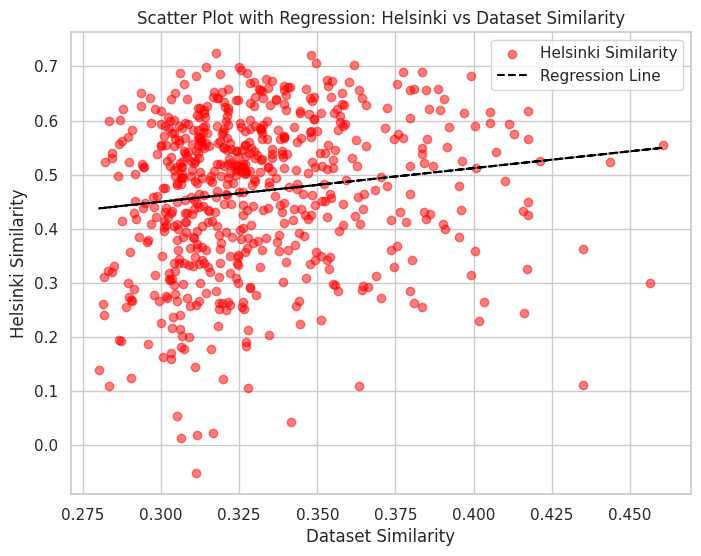

In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LinearRegression

# Carica i dati dal file CSV
file_path = 'unsupervised_results.csv'
data = pd.read_csv(file_path)

# Rimuovi righe con valori NaN
data = data.dropna(subset=['dataset_similarity', 'similarity_phi', 'similarity_madlad', 'similarity_helsinki'])

# Estrai le colonne rilevanti
dataset_similarity = data['dataset_similarity']
similarity_phi = data['similarity_phi']
similarity_madlad = data['similarity_madlad']
similarity_helsinki = data['similarity_helsinki']


# Funzione per creare scatter plot con linea di regressione
def scatter_with_regression(x, y, model_name, color):
    # Adatta una regressione lineare
    x = np.array(x).reshape(-1, 1)  # Reshape per sklearn
    y = np.array(y)
    reg = LinearRegression().fit(x, y)
    y_pred = reg.predict(x)  # Valori predetti dalla retta

    # Scatter plot
    plt.figure(figsize=(8, 6))
    plt.scatter(x, y, c=color, alpha=0.5, label=f'{model_name} Similarity')
    plt.plot(x, y_pred, color='black', linestyle='--', label='Regression Line')
    plt.xlabel('Dataset Similarity')
    plt.ylabel(f'{model_name} Similarity')
    plt.title(f'Scatter Plot with Regression: {model_name} vs Dataset Similarity')
    plt.legend()
    plt.grid(True)
    plt.show()

# Creare i grafici per ciascun modello
scatter_with_regression(dataset_similarity, similarity_phi, "Phi", "blue")
scatter_with_regression(dataset_similarity, similarity_madlad, "Madlad", "green")
scatter_with_regression(dataset_similarity, similarity_helsinki, "Helsinki", "red")


In [6]:
pip install seaborn

Note: you may need to restart the kernel to use updated packages.


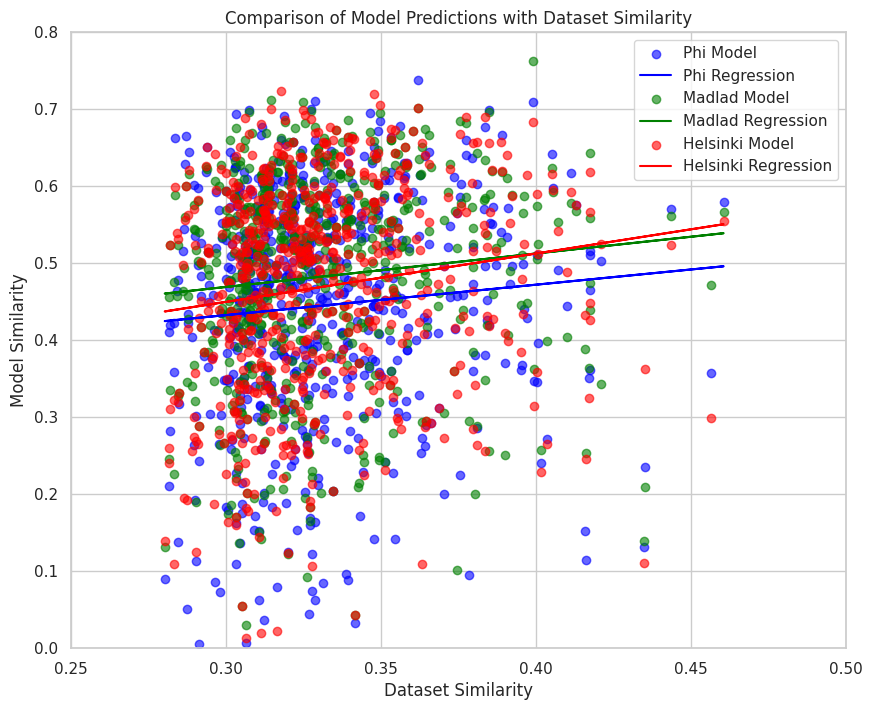

In [10]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import numpy as np
import seaborn as sns

# Carica il dataset
file_path = 'unsupervised_results.csv'
data = pd.read_csv(file_path)

# Funzione per aggiungere una linea di regressione
def add_regression_line(x, y, color, label, ax):
    """
    Aggiunge una linea di regressione al grafico.
    """
    # Rimuovi eventuali valori NaN
    valid_idx = ~np.isnan(x) & ~np.isnan(y)
    x_valid = x[valid_idx].reshape(-1, 1)
    y_valid = y[valid_idx]

    # Calcola la regressione lineare
    model = LinearRegression()
    model.fit(x_valid, y_valid)
    y_pred = model.predict(x_valid)
    
    # Aggiungi la linea al grafico
    ax.plot(x_valid, y_pred, color=color, label=label)

# Imposta il grafico
plt.figure(figsize=(10, 8))
sns.set(style="whitegrid")

# Asse x: dataset_similarity
x = data['dataset_similarity'].values

# Modello Phi
y_phi = data['similarity_phi'].values
plt.scatter(x, y_phi, color='blue', alpha=0.6, label='Phi Model')
add_regression_line(x, y_phi, color='blue', label='Phi Regression', ax=plt)

# Modello Madlad
y_madlad = data['similarity_madlad'].values
plt.scatter(x, y_madlad, color='green', alpha=0.6, label='Madlad Model')
add_regression_line(x, y_madlad, color='green', label='Madlad Regression', ax=plt)

# Modello Helsinki
y_helsinki = data['similarity_helsinki'].values
plt.scatter(x, y_helsinki, color='red', alpha=0.6, label='Helsinki Model')
add_regression_line(x, y_helsinki, color='red', label='Helsinki Regression', ax=plt)



# Gestione valori NaN
data.dropna(subset=['similarity_phi', 'similarity_madlad', 'similarity_helsinki'], inplace=True)

# Configurazione finale del grafico
plt.xlim(0.25, 0.5)  # Limitazione dell'asse x da 0 a 0.5
plt.ylim(0, 0.8)  # Limitazione dell'asse y da 0 a 0.5
plt.xlabel('Dataset Similarity')
plt.ylabel('Model Similarity')
plt.title('Comparison of Model Predictions with Dataset Similarity')
plt.legend()
plt.show()
